In [135]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
import cv2
import os

Ejercicio 1: Una deteccion de logo

El método de Template Matching realiza la busqueda y deteccion de una imagen, este metodo utiliza medidas de similitud para identificar la region con mayor parecido.
Para el ejercicio 1 la deteccion del logo se realiza con el siguiente proceso:

1. Procesamiento de la imagen template

    1.1. Umbralizacion de la imagen template
    
    1.2. Aplicacion de la morfologia (erosion y dilatacion)
    
    1.3. Recorte del template
    
    1.4. Escalado 

In [115]:
I_RETRO = cv2.imread('materiales/images/coca_retro_1.png')
I_RETRO.shape

(493, 715, 3)

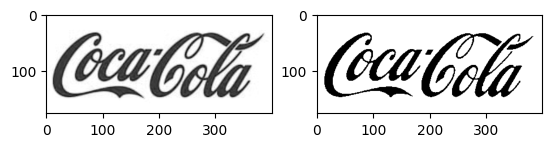

In [116]:
# lectura de template en escala de grises
I_template = cv2.imread('materiales/template/pattern.png',cv2.IMREAD_GRAYSCALE)

# umbralizacion
I_umbra = (I_template>147)*255

plt.subplot(1,2,1)
plt.imshow(I_template,cmap='gray')
plt.subplot(1,2,2)
plt.imshow(I_umbra,cmap='gray')

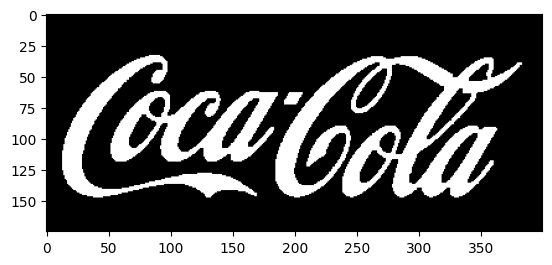

In [117]:
I_umbra2 = (I_umbra==0)*255

kernel1 = np.ones((4, 4), np.uint8)
kernel2 = np.ones((3, 3), np.uint8)
img_morp = cv2.dilate(I_umbra2.astype('uint8'), kernel1, iterations=1)
img_morp = cv2.erode(img_morp, kernel2, iterations=1)

plt.figure()
plt.imshow(img_morp,cmap='gray')

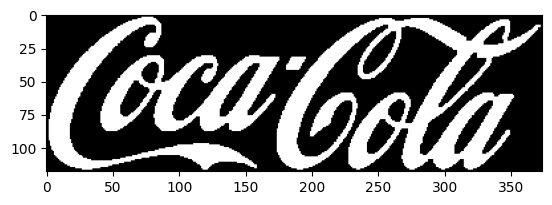

In [118]:
# encontrar los bordes de la figura
x,y = np.where(img_morp==255)

#recorte template
I_cut = img_morp[np.min(x)-2:np.max(x)+2,np.min(y)-2:np.max(y)+2].astype('uint8')

plt.figure()
plt.imshow(I_cut,cmap='gray')

In [119]:
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

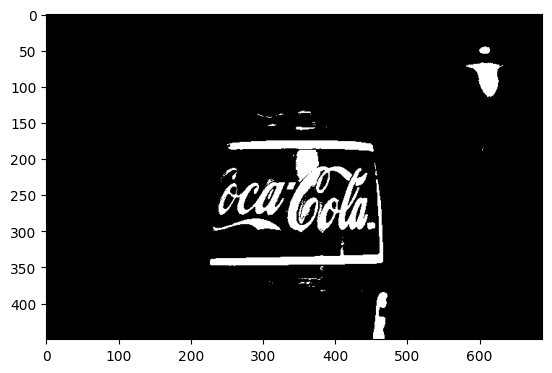

In [120]:
I = cv2.imread('materiales\\images\\logo_1.png')
I_gray2 = cv2.cvtColor(adjust_gamma(I,0.6),cv2.COLOR_BGR2GRAY)
I_proce = (I_gray2>130)*255

plt.imshow(I_proce,cmap='gray')

Todo los pasos de procesamiento de la imagen a evalauar y del tempalte se ha integradfo en una funcion llamada "detecta_coca_uno", esta funcion se encarga de detectar un solo logo que se elige como el de mejor magnituid de similitud.

In [173]:

def detect_coca_uno(img_temp, esca_y, esca_x, img_test, cambio_color):

    img_salida = img_test.copy()

    if cambio_color=='change_color':
        I_gray2 = cv2.cvtColor(adjust_gamma(I,0.6),cv2.COLOR_BGR2GRAY)
        I_proce = (I_gray2>130)*255
        I_proce = (I_proce==0)*255
    else:
        I_gray2 = cv2.cvtColor(adjust_gamma(I,0.6),cv2.COLOR_BGR2GRAY)
        I_proce = (I_gray2>130)*255

    I_cut = cv2.resize(img_temp,(esca_y,esca_x), interpolation=cv2.INTER_CUBIC)
    I_cut2 = ((I_cut>150)*255).astype('uint8')

    w, h = I_cut2.shape[::-1]

    res = cv2.matchTemplate(I_proce.astype('uint8'), I_cut2, cv2.TM_CCORR_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    bottom_right = (max_loc[0] + w, max_loc[1] + h)
    cv2.rectangle(img_salida,max_loc, bottom_right, (255,0,0), 6)

    return res,img_salida


Se evalua cada imagen que esta asociado a un escalamiento previamente determinado.

Nota: para la imagen "coca_retro_1.png" el logo es de color negro y cada compoenente RGB son iguales, lo cual representa a una imagen sin color, debido a esta particularidad se adiciona a la funcion el parametro de "change_color" para evaluar en caso las compoenetes r,g y b son similares, entonces realiozar la conversion invertida de la iamgen y obtener el logo de color blanco.

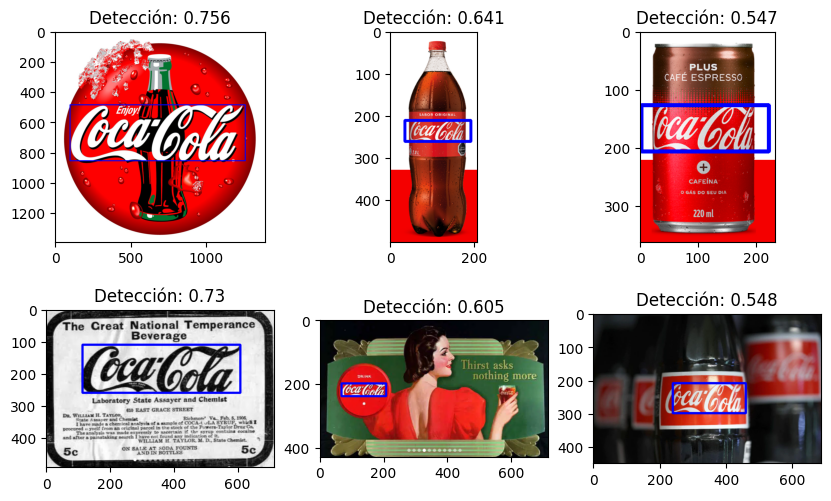

In [177]:

name_files = ['COCA-COLA-LOGO.jpg', 'coca_logo_1.png', 'coca_logo_2.png', 'coca_retro_1.png', 'coca_retro_2.png', 'logo_1.png']

resize_file = [[1159,370],[157,50],[220,80],[495,150],[140,40],[220,90]]

plt.figure(figsize=(10,6))
for i,name_i in enumerate(name_files):
    I = cv2.imread('materiales\\images\\'+name_i)

    if np.sum((I[:,:,0]==I[:,:,1]) & (I[:,:,0]==I[:,:,2]))/(I.shape[0]*I.shape[1]) >0.9:
        mat_salida, img_result = detect_coca_uno(I_cut,resize_file[i][0],resize_file[i][1],I,'change_color')
    else:
        mat_salida, img_result = detect_coca_uno(I_cut,resize_file[i][0],resize_file[i][1],I,'no_change')

    plt.subplot(2,3,i+1)
    plt.imshow(cv2.cvtColor(img_result,cv2.COLOR_BGR2RGB))
    plt.title('Detección: '+str(np.round(np.max(mat_salida),3)))

plt.show()


Ejercicio 2 :  

Para el ejercicio se tiene la particularidad de franjas blancas que realizan un match de gran similitud con el logo, una solucion rapida fue eliminar(agregar ceros) a travez de su posicion. Luego todo el proceso es igual al ejercicio 1, cambiando 2 parametros importantes:

- escalado del template: 75,35
- umbral : >0.45

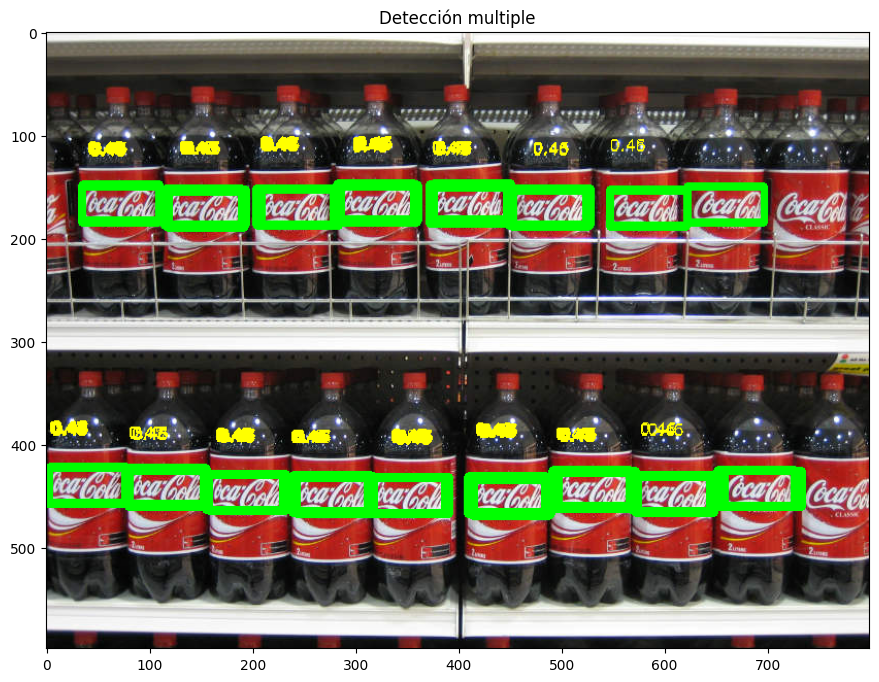

In [198]:
I = cv2.imread('materiales\\images\\coca_multi.png')

img_salida = I.copy()

I_gray2 = cv2.cvtColor(adjust_gamma(I,0.6),cv2.COLOR_BGR2GRAY)
I_proce = (I_gray2>130)*255

I_proce[278:308,:] = 0
I_proce[550:587,:] = 0


I_cut = cv2.resize(I_cut,(75,35), interpolation=cv2.INTER_CUBIC)
I_cut2 = ((I_cut>150)*255).astype('uint8')

w, h = I_cut2.shape[::-1]

res = cv2.matchTemplate(I_proce.astype('uint8'), I_cut2, cv2.TM_CCORR_NORMED)

loc = np.where(res>0.45)


for pt in zip(*loc[::-1]):
    cv2.rectangle(img_salida, pt, (pt[0]+w, pt[1]+h), (0,255,0), 5)
    #cv2.putText(img_salida,str(np.round(res[pt[1],pt[0]],2)),(pt[0]-w, pt[1]-h),cv2.FONT_HERSHEY_SIMPLEX,0.5,(0, 255, 255),1)

plt.figure(figsize=(12,8))
plt.imshow(cv2.cvtColor(img_salida,cv2.COLOR_BGR2RGB))
plt.title('Detección multiple')
plt.show()

Ejercicio 3: Para este ejercicio se crea una funcion "proceso_template" para encapsular el procesamiento a la imagen del template

In [199]:
def proce_template(I_template):
	
    I_umbra = (I_template>147)*255 #umbralizacion

    I_umbra2 = (I_umbra==0)*255 # inversion de intensidad

    kernel1 = np.ones((4, 4), np.uint8)
    kernel2 = np.ones((3, 3), np.uint8)
    img_morp = cv2.dilate(I_umbra2.astype('uint8'), kernel1, iterations=1) # dilatacion para engrosar y unir los vacios(huecos) de pixeles
    img_morp = cv2.erode(img_morp, kernel2, iterations=1) # erosionar para afinar y resstablecer al grosor inicial

    # encontrar los bordes de la figura para recortar
    x,y = np.where(img_morp==255)

    #recorte template
    I_cut = img_morp[np.min(x):np.max(x),np.min(y):np.max(y)].astype('uint8')

    return I_cut

Para el ejercicio 3 solo se varia el parámetro de umbral para realizar al deteccion del template, falta afinar el algoritmo para lograr detectar de forma autmatica el umbral exacto para deteccion ya que al variar el tamaño del template existe detecciones de falso positivo con fondos de color blanco. Se puede limitar el rango de escalamiento pero se busca que el proceso sea robusto

0.60288244 453
123 23


Text(0.5, 1.0, 'Deteccion')

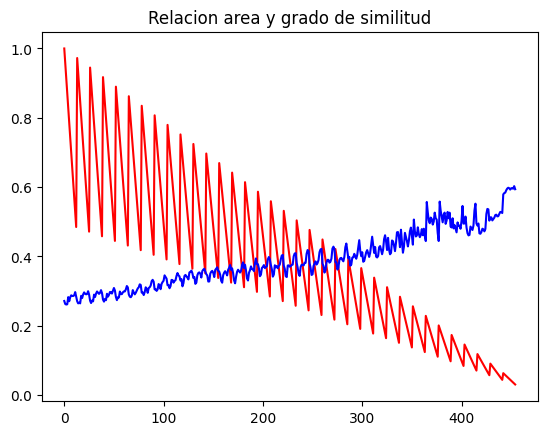

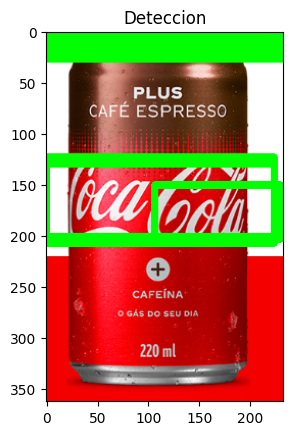

In [232]:
I = cv2.imread('materiales\\images\\coca_logo_2.png')
I_gray = cv2.cvtColor(I,cv2.COLOR_BGR2GRAY)
I_template = cv2.imread('materiales\\template\\pattern.png',cv2.IMREAD_GRAYSCALE)


I_tem_cut = proce_template(I_template) #template final

img_test = I.copy()

val_simi = []
val_size_y = []
val_size_x = []
val_area = []

# bucle iterativo para reescalamiento del template
for Mx in range(I_gray.shape[0],20,-10):
    for Ny in range(I_gray.shape[1],110,-10):
        I_gray2 = cv2.cvtColor(adjust_gamma(I,0.6),cv2.COLOR_BGR2GRAY)
        I_proce = (I_gray2>130)*255

        I_cut = cv2.resize(I_tem_cut,(Ny,Mx), interpolation=cv2.INTER_CUBIC)
        I_cut2 = ((I_cut>150)*255).astype('uint8')

        w, h = I_cut2.shape[::-1]

        res = cv2.matchTemplate(I_proce.astype('uint8'), I_cut2, cv2.TM_CCORR_NORMED)
        val_simi.append(np.max(res))
        val_size_y.append(Ny)
        val_size_x.append(Mx)
        val_area.append(Ny*Mx)
        loc = np.where(res>0.55)

        for pt in zip(*loc[::-1]):
            cv2.rectangle(img_test, pt, (pt[0]+w, pt[1]+h), (0,255,0), 5)


print(np.max(val_simi), val_simi.index(np.max(val_simi)))
print(val_size_y[val_simi.index(np.max(val_simi))],val_size_x[val_simi.index(np.max(val_simi))])


val_area = np.array(val_area)

plt.figure()
plt.plot(val_area/np.max(val_area),'r')
plt.plot(val_simi,'b')
plt.title('Relacion area y grado de similitud')
plt.figure()
plt.imshow(cv2.cvtColor(img_test,cv2.COLOR_BGR2RGB))
plt.title('Deteccion')